In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
path  =  "/content/drive/MyDrive/new1/data/train.csv/train.csv"
train =  pd.read_csv(path)
train = train.sample(frac=1)

In [8]:
df=train
train.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
26780,46f96cc5717f395a,Point well taken. Done.,0,0,0,0,0,0
156921,d5af077462f356d7,""":::* I'm not using jabs or insults of any kin...",0,0,0,0,0,0
35584,5f17cc76145c860d,"""\n The HMC definition of public school seems ...",0,0,0,0,0,0
3475,095dd6cfb134cc49,eps with her as co-HW no longer air; therefore...,0,0,0,0,0,0
25940,44ae6367ed2cfc66,"Awww, my deepest appologies, here's a Kleenex.",0,0,0,0,0,0


In [9]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


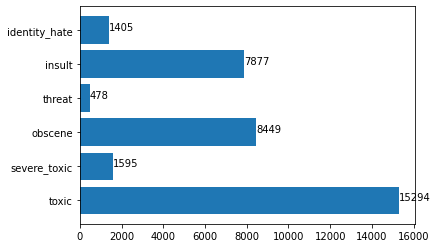

In [11]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

toxic =  sum(train["toxic"])
severe_toxic = sum(train["severe_toxic"])
obscene = sum(train["obscene"])
threat = sum(train["threat"])
insult =  sum(train["insult"])
identity_hate = sum(train["identity_hate"])


list_value = [toxic, severe_toxic, obscene, threat, insult, identity_hate]


plt.barh(list_classes, list_value)
  
for index, value in enumerate(list_value):
    plt.text(value, index,str(value))
  
plt.show()

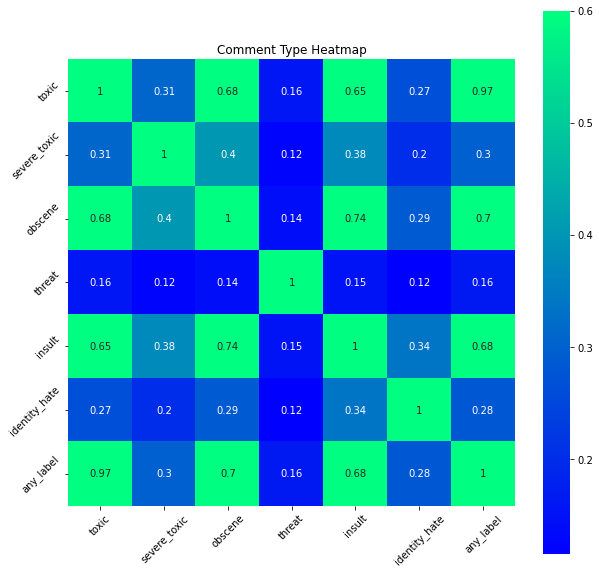

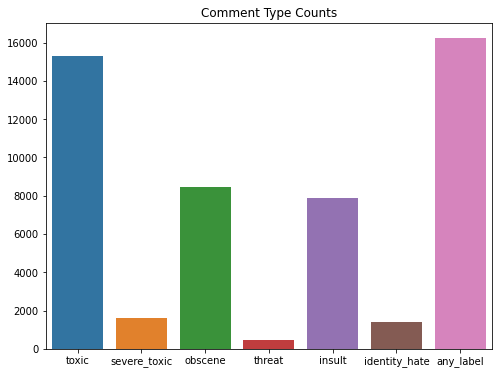

In [10]:
Tile = list(df.columns[2:])
df_Tile = df[Tile].copy()

toxic_rows = df_Tile.sum(axis=1)
toxic_rows = (toxic_rows > 0)

Tile.append('any_label')#Any label is summation ofalllabels.
df_Tile['any_label'] = toxic_rows

count_dic = {}
for comment_type in Tile:
    counts = list()
    others = list(Tile)
    df_selection = df_Tile[(df_Tile[comment_type]==1)]
    others.remove(comment_type)
    counts.append(('total', len(df_selection)))
    for other in others:
        counts.append((other, df_selection[other].sum()))
    count_dic[comment_type] = counts


del(df_selection)

def heatmap(df, title):
    plt.figure('heatmap', figsize=[10,10])
    plt.title(title)
    df_corr = df.corr()
    sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='winter')
    plt.yticks(rotation = 45)
    plt.xticks(rotation = 45)
    plt.show()

heatmap(df_Tile, 'Comment Type Heatmap')



totals = []
for key, value in count_dic.items():
    totals.append(value[0][1])
   
    

plt.figure('Comment Type Counts', figsize=[8,6])
plt.title('Comment Type Counts')
sns.barplot(x=list(count_dic.keys()), y=totals)
plt.show()